# Experiment  and Simulation

## Script Details

- The script used to record sensor information during in-hand manipulation with three different hand types

## Retrieving Action trajectory from earlier simulation with point cloud wrapper over open ai gym environment

In [1]:
import pickle
import os
import glob
import pandas as pd

In [2]:
current_location=os.getcwd()
print(current_location)

/home/015898207/geometry-dex/download


In [3]:
os.chdir("..")
location=os.getcwd()
print(location)

/home/015898207/geometry-dex


In [4]:
glob.glob("*")

['LICENSE',
 'README.md',
 'arguments_pointnet.py',
 'dex_envs',
 'images',
 'install-baselines.sh',
 'models',
 'requirements.txt',
 'rl_modules',
 'sans-serif.ttf',
 'wrappers.py',
 '__pycache__',
 'dex_logs',
 'wandb',
 'run_ddpg.py',
 'train_pointnet.py',
 'pl2ap-srun.log',
 'arguments_ddpg.py',
 'main2.sh',
 'test.log',
 'srun_ball.log',
 'srun_knife.log',
 'mainscript.sh',
 'script2.sh',
 'srun_a_cups.log',
 'trial.py',
 'trial.ipynb',
 'download',
 'point cloud test.ipynb',
 'mem.pkl',
 'run_2_frame_1_2sensor.csv',
 'Untitled.ipynb',
 'mem2.pkl',
 'traj_action.pkl',
 'snap',
 'base_hand1.png',
 'hand1.csv',
 'test_1.py']

In [5]:
# open a file, where you ant to store the data
file = open('mem2.pkl', 'rb')
# Loading information to that file
memory=pickle.load(file)
# close the file
file.close()

In [6]:
memory.keys()

dict_keys(['observations', 'achieved_goal', 'goal', 'actions', 'rewards', 'sensors', 'site_data'])

In [7]:
memory['actions'].shape

(3, 100, 20)

In [8]:
pd.DataFrame(memory['rewards'].reshape(3,100).T).head(20)

,0,1,2
0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0


In [9]:
ls_action=memory['actions'][2][:15]

In [10]:
ls_action.shape

(15, 20)

In [11]:
# open a file, where you ant to store the data
file = open('traj_action.pkl', 'wb')
# Loading information to that file
pickle.dump(ls_action,file)
# close the file
file.close()

# Simulation with hand 1

In [12]:
import numpy as np
import pandas as pd
import gym # Gym 
from matplotlib import pyplot as plt # plotting images

import dex_envs # To load xustom xml file
from wrappers import PointCloudWrapper # PointCloudWrapper
from rl_modules.utils import *
from rl_modules.ddpg_agent import ddpg_agent

In [13]:
# open a file, where you ant to store the data
file = open('traj_action.pkl', 'rb')
# Loading information to that file
ls_action=pickle.load(file)
# close the file
file.close()

In [14]:
env_name="a_cups"
#e = gym.make('{}-rotate-v1'.format(env_name),render_mode="human")# New Gym code
e = gym.make('{}-rotate-v1'.format(env_name))
obs=e.reset()

Import error. Trying to rebuild mujoco_py.
running build_ext
building 'mujoco_py.cymj' extension
gcc -pthread -B /home/015898207/anaconda3/envs/ob/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/015898207/anaconda3/envs/ob/lib/python3.6/site-packages/mujoco_py -I/home/015898207/.mujoco/mjpro150/include -I/home/015898207/anaconda3/envs/ob/lib/python3.6/site-packages/numpy/core/include -I/home/015898207/anaconda3/envs/ob/include/python3.6m -c /home/015898207/anaconda3/envs/ob/lib/python3.6/site-packages/mujoco_py/cymj.c -o /home/015898207/anaconda3/envs/ob/lib/python3.6/site-packages/mujoco_py/generated/_pyxbld_1.50.1.68_36_linuxcpuextensionbuilder/temp.linux-x86_64-3.6/home/015898207/anaconda3/envs/ob/lib/python3.6/site-packages/mujoco_py/cymj.o -fopenmp -w
gcc -pthread -B /home/015898207/anaconda3/envs/ob/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/015898207/anaconda3/envs/ob/lib/python3.6/site-pa

LinkError: command 'gcc' failed with exit status 1

In [8]:
from copy import deepcopy
d=deepcopy(e)

In [9]:
len(e.sim.data.sensordata)

600

In [ ]:
def get_sensor_storage(e):
    df_sensors=pd.DataFrame(zip(e.sim.model.sensor_names,e.sim.model.sensor_objid),columns=["sensor_name","obj_id"])
    df_sensors["site_name"]=df_sensors.sensor_name.map(lambda x:x[1:])
    df_sensors["site_present"]=df_sensors["site_name"].map(lambda x: x in  e.sim.model.site_names)
    df_sensors["site_id"]=df_sensors["site_name"].map(lambda x:e.sim.model.site_name2id(x))
    df_sensors["x"],df_sensors["y"],df_sensors["z"] = list(zip(*list(map(lambda x:list(e.sim.data.site_xpos[x]) if x>-1 else [-1,-1,-1],df_sensors["site_id"]))))
    df_sensors["sensor_data"]=e.sim.data.sensordata
    df_sensors["sensor_active"]=0
    df_sensors.loc[df_sensors["sensor_data"]!=0,"sensor_active"]=1
    return df_sensors

In [ ]:
df_sensors=get_sensor_storage(e)

In [12]:
df_sensors2 = df_sensors.loc[df_sensors['site_id']>-1,:]
len(df_sensors2),sum(df_sensors2["sensor_active"])

(600, 4)

In [13]:
%matplotlib widget

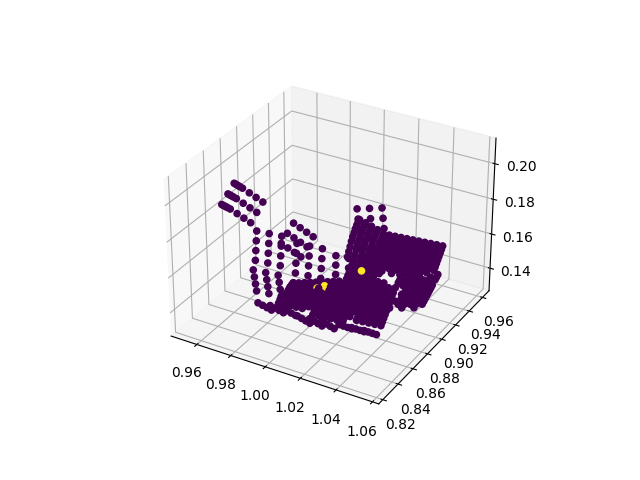

In [14]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Normalized data
#ax.set_xlim(0,40)
#ax.set_ylim(0,40)
#ax.set_zlim(0,40)
ax.scatter(df_sensors2["x"], df_sensors2["y"], df_sensors2["z"], c=df_sensors2["sensor_active"], alpha=1)
plt.show()


In [15]:
plt.savefig('snap/base_hand1.png')

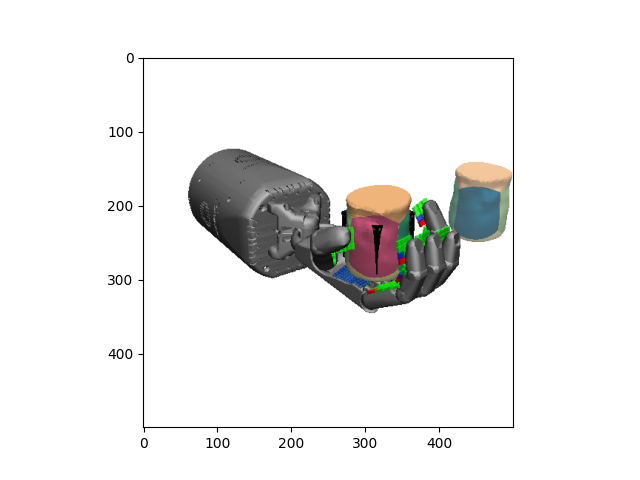

In [16]:
fig = plt.figure()
img = e.env.render(mode='rgb_array') 
plt.imshow(img) 
plt.show() 

In [17]:
action = e.action_space.sample()
print(action,len(action))

[-0.04343442  0.22751223 -0.45130607  0.32257652 -0.7350582   0.78751606
 -0.11727609  0.03464443  0.7233422   0.92304635 -0.26271665  0.6340537
 -0.00179014 -0.99714845  0.04299533 -0.9717928  -0.89021784  0.4459336
  0.9720797  -0.533966  ] 20


In [18]:
e.reset()

{'observation': array([-1.74029045e-01, -2.01911874e-01, -2.48948547e-04,  7.62252406e-01,
         6.59369150e-01,  6.03299370e-01,  8.86585129e-03,  7.55450078e-01,
         6.55644727e-01,  5.99096857e-01,  5.84771312e-02,  7.19118504e-01,
         5.84092305e-01,  5.15297102e-01,  2.03387907e-01, -6.51818349e-02,
         7.52978196e-01,  6.74179159e-01,  6.19728615e-01, -2.07425007e-01,
         8.08240754e-01, -7.85857952e-03, -1.09545755e-03, -7.75961560e-01,
        -6.60988882e-04, -1.29218712e-02,  1.91829275e-04,  1.12651714e-01,
         5.51388932e-01,  6.63276074e-01,  6.71335723e-03,  1.09612897e-01,
         5.45805518e-01,  6.57097015e-01,  3.36208690e-03,  5.46622880e-02,
         3.49452059e-01,  4.22969440e-01, -8.30211659e-02, -2.01724983e-02,
         1.70465709e-01,  5.98521051e-01,  7.16360074e-01,  4.96760172e-01,
         5.38877817e-01,  7.17947849e-05,  6.33352244e-04, -1.11538304e-01,
        -9.45119048e-03, -1.28804000e-02, -2.85220409e-03,  3.65071693e-0

In [19]:
import time




In [20]:
mem={"sensor_data":[],
    "env_img":[],
    "rewards":[],
    "obs":[],
    "x":[],
    "y":[],
    "z":[]}
start_time = time.time()
for i in range(15):
#    #action = policy(observation)  # User-defined policy function
#    action = env.action_space.sample()
    #print(i)
    action=list(ls_action[i])
    
    observation, reward, done, info = e.step(action)
    #print("action_done")
    mem["sensor_data"].append(list(e.sim.data.sensordata))
    img = e.env.render(mode='rgb_array')
    #print("render done")
    mem["env_img"].append(img)
    mem["rewards"].append(reward)
    mem["obs"].append(observation)
    x,y,z = list(zip(*list(map(lambda x:list(e.sim.data.site_xpos[x]) if x>-1 else [-1,-1,-1],df_sensors["site_id"]))))
    mem["x"].append(x)
    mem["y"].append(y)
    mem["z"].append(z)
    
    if done:
        break
        #observation, info = e.reset()
print("--- %s seconds ---" % (time.time() - start_time))

--- 56.091920614242554 seconds ---


In [21]:
e.close()

In [22]:
def save_sensor_data(df_sensor,sensor_data,mem,i,file_name):
    df_sensor["sensor_data"]=sensor_data
    df_sensor["sensor_active"]=0
    df_sensors.loc[df_sensors["sensor_data"]!=0,"sensor_active"]=1
    df_sensors2 = df_sensors.loc[df_sensors['site_id']>-1,:]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(mem["x"][i], mem["y"][i], mem["z"][i], c=df_sensors2["sensor_active"], alpha=1)
    #plt.show()
    plt.savefig(file_name)
    plt.close()

def save_img_data(img,file_name):
    fig = plt.figure()
    plt.imshow(img) 
    plt.savefig(file_name)
    #plt.show()
    plt.close()

    
    

# Visualization

In [33]:
for i in range(15):
    file_name="snap/base_hand1_step_sd_"+str(i+1)+".png"
    save_sensor_data(df_sensors,mem["sensor_data"][i],mem,i,file_name)
    file_name="snap/base_hand1_step_"+str(i+1)+".png"
    save_img_data(mem["env_img"][i],file_name)
    
    

In [34]:
mem["env_img"][1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
df_heat=pd.DataFrame()

In [25]:

for i in mem["sensor_data"]:
    df_heat=pd.concat([df_heat,pd.DataFrame(i)],axis=1)

In [26]:
df_heat.shape

(600, 15)

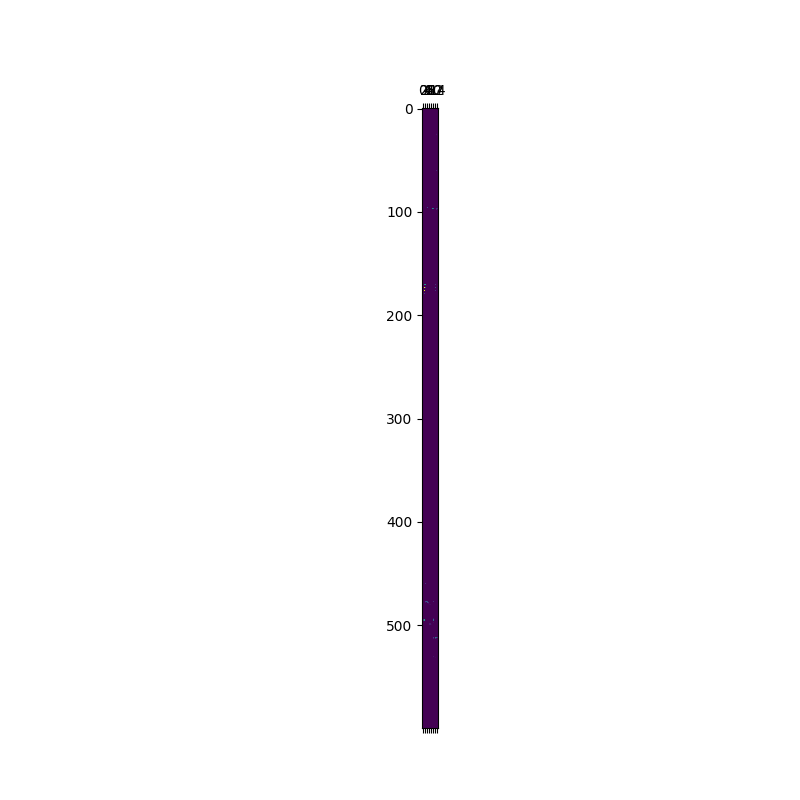

In [27]:
plt.close()
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = [2, 200]
#plt.rcParams["figure.autolayout"] = True
matfig = plt.figure(figsize=(8,8))
#df = pd.DataFrame({"col1": [1, 3, 5, 7, 1], "col2": [1, 5, 7, 9, 1]})
plt.matshow(df_heat, fignum=matfig.number)
plt.show()

In [29]:
df_heat.columns=list(range(15))

In [36]:
df_heat["active"]=df_heat.apply(lambda row: sum([True for i in range(15) if row[i]]),axis=1)
df_heat2= df_heat.loc[df_heat["active"]>0,list(range(15))]

In [40]:
import seaborn as sns

In [37]:
df_heat2.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.096170,0.0000
25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.457152,0.0000
26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.096642,0.0000
60,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.838198,0.0000
96,0.000000,0.000000,0.000000,0.000000,0.000000,1.836459,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0000
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.549287,2.868185,0.0,0.000000,1.120477,0.8558
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.749551,0.0000
170,0.000000,0.000000,3.925950,4.708057,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.026617,0.000000,0.0000
173,0.000000,0.000000,8.467048,1.866581,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.860981,0.000000,0.0000
176,0.000000,0.000000,8.169642,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.234696,0.000000,0.0000


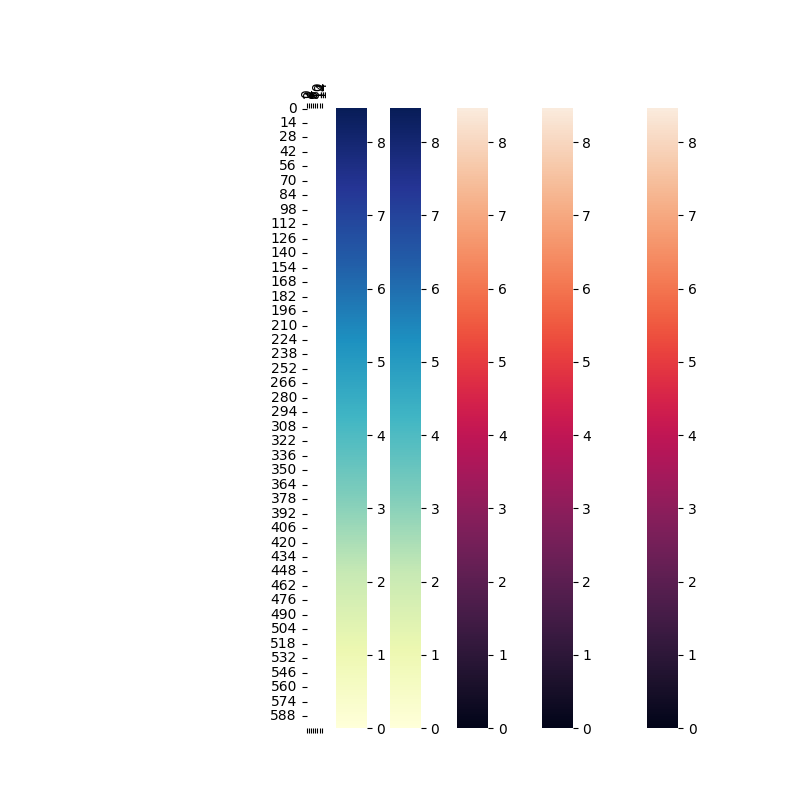

In [46]:
sns.heatmap(df_heat,linewidth=2,cmap="YlGnBu")
plt.show()

In [190]:
df_heat.to_csv("hand1.csv")

In [44]:
import sys
sys. getsizeof(e.sim.model)

2144

In [45]:
sys. getsizeof(e.sim.data)

816

# HAnd 2

In [46]:
env_name="a_cups2"
#e = gym.make('{}-rotate-v1'.format(env_name),render_mode="human")# New Gym code
e = gym.make('{}-rotate-v1'.format(env_name))
obs=e.reset()

In [47]:
len(e.sim.data.sensordata)

92

In [53]:
def get_sensor_storage(e):
    df_sensors=pd.DataFrame(zip(e.sim.model.sensor_names,e.sim.model.sensor_objid),columns=["sensor_name","obj_id"])
    df_sensors["site_name"]=df_sensors.sensor_name.map(lambda x:x.replace('S',''))
    df_sensors["site_present"]=df_sensors["site_name"].map(lambda x: x in  e.sim.model.site_names)
    df_sensors["site_id"]=df_sensors["site_name"].map(lambda x:e.sim.model.site_name2id(x))
    df_sensors["x"],df_sensors["y"],df_sensors["z"] = list(zip(*list(map(lambda x:list(e.sim.data.site_xpos[x]) if x>-1 else [-1,-1,-1],df_sensors["site_id"]))))
    df_sensors["sensor_data"]=e.sim.data.sensordata
    df_sensors["sensor_active"]=0
    df_sensors.loc[df_sensors["sensor_data"]!=0,"sensor_active"]=1
    return df_sensors

In [54]:
df_sensors=get_sensor_storage(e)

In [55]:
df_sensors2 = df_sensors.loc[df_sensors['site_id']>-1,:]
len(df_sensors2),sum(df_sensors2["sensor_active"])

(92, 7)

In [56]:
%matplotlib widget

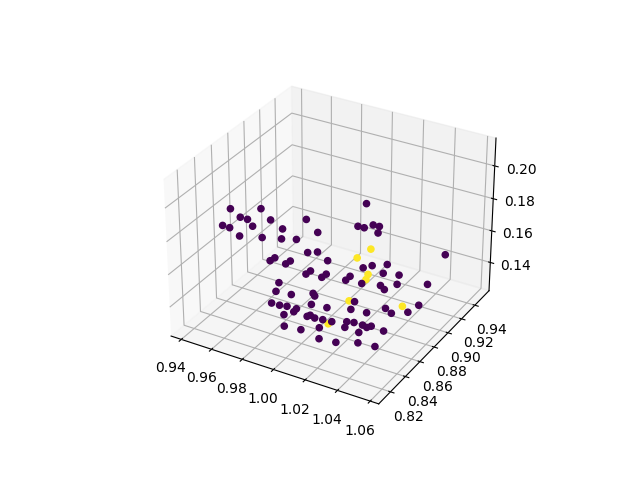

In [57]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Normalized data
#ax.set_xlim(0,40)
#ax.set_ylim(0,40)
#ax.set_zlim(0,40)
ax.scatter(df_sensors2["x"], df_sensors2["y"], df_sensors2["z"], c=df_sensors2["sensor_active"], alpha=1)
plt.show()


In [58]:
plt.savefig('snap/base_hand1.png')

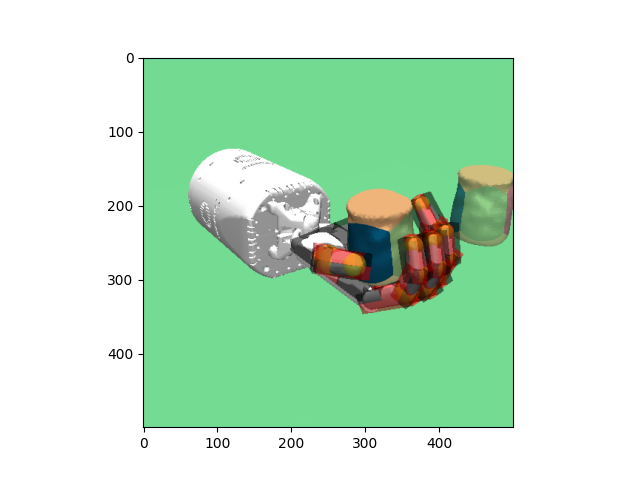

In [59]:
fig = plt.figure()
img = e.env.render(mode='rgb_array') 
plt.imshow(img) 
plt.show() 

In [60]:
action = e.action_space.sample()
print(action,len(action))

[-0.9662396  -0.5450962   0.37966293 -0.5831564   0.818663    0.40762213
  0.43554303  0.84092075  0.44290367 -0.02539526 -0.82784724  0.5190049
 -0.9736373  -0.56141573 -0.1878806   0.5487479   0.5868972   0.4908224
  0.5165235  -0.21527556] 20


In [61]:
e.reset()

{'observation': array([-1.74291900e-01, -1.98731447e-01, -1.57976408e-04,  7.63328785e-01,
         6.59385448e-01,  6.03314157e-01, -1.90549734e-04,  7.63311415e-01,
         6.59360814e-01,  6.03287870e-01,  5.62387721e-03,  7.36650542e-01,
         6.42239507e-01,  5.84006905e-01,  3.29693750e-01, -8.27233023e-03,
         7.76097590e-01,  6.66260937e-01,  6.10610841e-01,  2.87977180e-03,
         5.81164678e-01, -7.15210358e-03, -1.57262945e-03, -7.76201397e-01,
         1.42356994e-03, -2.12921039e-02,  1.28169443e-04,  1.11987906e-01,
         5.50402719e-01,  6.62129757e-01,  1.55704319e-04,  1.11772903e-01,
         5.50345258e-01,  6.62054538e-01,  2.39485205e-02, -5.89659758e-02,
         4.01146974e-01,  4.86341214e-01,  8.82178182e-02, -1.67128189e-02,
         2.53833997e-01,  5.99459807e-01,  7.18514950e-01,  6.92424801e-04,
         7.96135334e-02, -1.64777798e-03, -4.23954063e-04, -1.07704109e-01,
        -1.28485352e-02, -1.47699223e-02, -3.73479002e-03,  4.37309951e-0

In [62]:
import time




In [137]:
mem={"sensor_data":[],
    "env_img":[],
    "rewards":[],
    "obs":[],
    "x":[],
    "y":[],
    "z":[]}
start_time = time.time()
for i in range(15):
#    #action = policy(observation)  # User-defined policy function
#    action = env.action_space.sample()
    #print(i)
    action=list(ls_action[i])
    
    observation, reward, done, info = e.step(action)
    #print("action_done")
    mem["sensor_data"].append(list(e.sim.data.sensordata))
    img = e.env.render(mode='rgb_array')
    #print("render done")
    mem["env_img"].append(img)
    mem["rewards"].append(reward)
    mem["obs"].append(observation)
    x,y,z = list(zip(*list(map(lambda x:list(e.sim.data.site_xpos[x]) if x>-1 else [-1,-1,-1],df_sensors["site_id"]))))
    mem["x"].append(x)
    mem["y"].append(y)
    mem["z"].append(z)
    
    if done:
        break
        #observation, info = e.reset()
print("--- %s seconds ---" % (time.time() - start_time))

--- 10.112444639205933 seconds ---


In [143]:
e.close()

In [144]:
def save_sensor_data(df_sensor,sensor_data,mem,i,file_name):
    df_sensor["sensor_data"]=sensor_data
    df_sensor["sensor_active"]=0
    df_sensors.loc[df_sensors["sensor_data"]!=0,"sensor_active"]=1
    df_sensors2 = df_sensors.loc[df_sensors['site_id']>-1,:]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(mem["x"][i], mem["y"][i], mem["z"][i], c=df_sensors2["sensor_active"], alpha=1)
    #plt.show()
    plt.savefig(file_name)
    plt.close()

def save_img_data(img,file_name):
    fig = plt.figure()
    plt.imshow(img) 
    plt.savefig(file_name)
    #plt.show()
    plt.close()

    
    

# Visualization

In [145]:
for i in range(15):
    file_name="snap/base_hand1_step_sd_"+str(i+1)+".png"
    save_sensor_data(df_sensors,mem["sensor_data"][i],mem,i,file_name)
    file_name="snap/base_hand1_step_"+str(i+1)+".png"
    save_img_data(mem["env_img"][i],file_name)
    
    

In [146]:
mem["env_img"][1]

array([[[114, 219, 145],
        [114, 219, 145],
        [114, 219, 145],
        ...,
        [114, 219, 145],
        [114, 219, 145],
        [114, 219, 145]],

       [[114, 219, 145],
        [114, 219, 145],
        [114, 219, 145],
        ...,
        [114, 219, 145],
        [114, 219, 145],
        [114, 219, 145]],

       [[114, 219, 145],
        [114, 219, 145],
        [114, 219, 145],
        ...,
        [114, 219, 145],
        [114, 219, 145],
        [114, 219, 145]],

       ...,

       [[116, 220, 146],
        [116, 220, 146],
        [116, 220, 146],
        ...,
        [116, 220, 146],
        [116, 220, 146],
        [116, 220, 146]],

       [[116, 220, 146],
        [116, 220, 146],
        [116, 220, 146],
        ...,
        [116, 220, 146],
        [116, 220, 146],
        [116, 220, 146]],

       [[116, 220, 146],
        [116, 220, 146],
        [116, 220, 146],
        ...,
        [116, 220, 146],
        [116, 220, 146],
        [116, 220, 146]]

In [147]:
df_heat=pd.DataFrame()

In [148]:

for i in mem["sensor_data"]:
    df_heat=pd.concat([df_heat,pd.DataFrame(i)],axis=1)

In [149]:
df_heat.shape

(92, 15)

In [150]:
df_heat=df_heat.replace(0.000000,0)

In [153]:
for index, row in df_heat.iterrows():
    for col,val in row.iteritems():
        if val !=0:
            df_heat.iloc[index,col]=val
        else:
            df_heat.iloc[index,col]=int(df_heat.iloc[index,col])

In [154]:
df_heat.tail(20)

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
73,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
74,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.943373,0.0,0.0,0.0,0.0
75,0.0,0.00000,0.000000,0.83686,0.589311,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
76,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
77,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
78,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
79,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
80,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
81,0.0,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [164]:
import seaborn as sns
sns.heatmap(df_heat.values)

AttributeError: 'Canvas' object has no attribute '_last_buff'

In [165]:
import plotly.express as px

In [166]:
import plotly.express as px

fig = px.imshow([[1, 20, 30],
                 [20, 1, 60],
                 [30, 60, 1]])
fig.show()


In [56]:
df_heat.to_csv("hand1.csv")

In [44]:
import sys
sys. getsizeof(e.sim.model)

2144

In [45]:
sys. getsizeof(e.sim.data)

816